[ 0.90014945 -1.30542276 -0.98276093 ...  0.85619144  0.16643805
  0.08904185]
(10000,)
手动计算均值、标准差、偏度、峰度： -0.0004954953433685514 0.9909993824098732 0.05074345070122357 0.029190508203237542
avg、std、rl、hl： -0.0004954953433685576 0.9909993824098741 0.05074345070122325 0.029190508203215337
手动计算均值、标准差、偏度、峰度： [ 0.00074577 -0.00261235] [1.00176875 0.99871136] [-0.00328633  0.0208986 ] [0.00891316 0.01390389]
函数库计算均值、标准差、偏度、峰度： [ 0.00074577 -0.00261235] [1.00176875 0.99871136] [-0.00328633  0.0208986 ] [0.00891316 0.01390389]
样本总数： 100000.0
x =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
y =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,

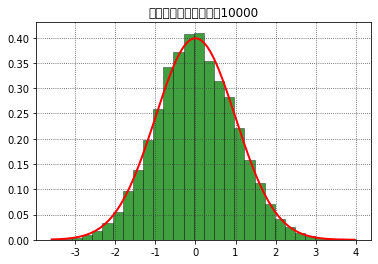

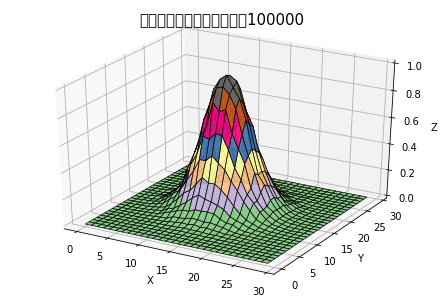

In [5]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-
# @Author: Runsen

import numpy as np
from scipy import stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn


def calc_statistics(x):
    n = x.shape[0]  # 样本个数
    # 手动计算
    m = 0
    m2 = 0
    m3 = 0
    m4 = 0
    for t in x:
        m += t
        m2 += t*t
        m3 += t**3
        m4 += t**4
    m /= n
    m2 /= n
    m3 /= n
    m4 /= n

    mu = m
    sigma = np.sqrt(m2 - mu*mu)
    skew = (m3 - 3*mu*m2 + 2*mu**3) / sigma**3
    kurtosis = (m4 - 4*mu*m3 + 6*mu*mu*m2 - 4*mu**3*mu + mu**4) / sigma**4 - 3
    print('手动计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)

    # 使用系统函数验证
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return mu, sigma, skew, kurtosis


if __name__ == '__main__':
    d = np.random.randn(10000)
    print(d)
    print(d.shape)
    mu, sigma, skew, kurtosis = calc_statistics(d)
    print('avg、std、rl、hl：', mu, sigma, skew, kurtosis)
    # 一维直方图
    mpl.rcParams['font.sans-serif'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(num=1, facecolor='w')
    y1, x1, dummy = plt.hist(d, bins=30, normed=True, color='g', alpha=0.75, edgecolor='k', lw=0.5)
    t = np.arange(x1.min(), x1.max(), 0.05)
    y = np.exp(-t**2 / 2) / math.sqrt(2*math.pi)
    plt.plot(t, y, 'r-', lw=2)
    plt.title('高斯分布，样本个数：%d' % d.shape[0])
    plt.grid(b=True, ls=':', color='#404040')
    # plt.show()

    d = np.random.randn(100000, 2)
    mu, sigma, skew, kurtosis = calc_statistics(d)
    print('函数库计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)

    # 二维图像
    N = 30
    density, edges = np.histogramdd(d, bins=[N, N])
    print('样本总数：', np.sum(density))
    density /= density.max()
    x = y = np.arange(N)
    print('x = ', x)
    print('y = ', y)
    t = np.meshgrid(x, y)
    print(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(t[0], t[1], density, c='r', s=50*density, marker='o', depthshade=True, edgecolor='k')
    ax.plot_surface(t[0], t[1], density, cmap=cm.Accent, rstride=1, cstride=1, alpha=0.9, lw=0.75, edgecolor='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('二元高斯分布，样本个数：%d' % d.shape[0], fontsize=15)
    plt.tight_layout(0.1)
    plt.show()

x1 = 
 [[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 [-4.6 -4.6 -4.6 ... -4.6 -4.6 -4.6]
 ...
 [ 4.6  4.6  4.6 ...  4.6  4.6  4.6]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 5.   5.   5.  ...  5.   5.   5. ]]
x2 = 
 [[-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 ...
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]]
x = 
 [[[-5.  -5. ]
  [-5.  -4.8]
  [-5.  -4.6]
  ...
  [-5.   4.6]
  [-5.   4.8]
  [-5.   5. ]]

 [[-4.8 -5. ]
  [-4.8 -4.8]
  [-4.8 -4.6]
  ...
  [-4.8  4.6]
  [-4.8  4.8]
  [-4.8  5. ]]

 [[-4.6 -5. ]
  [-4.6 -4.8]
  [-4.6 -4.6]
  ...
  [-4.6  4.6]
  [-4.6  4.8]
  [-4.6  5. ]]

 ...

 [[ 4.6 -5. ]
  [ 4.6 -4.8]
  [ 4.6 -4.6]
  ...
  [ 4.6  4.6]
  [ 4.6  4.8]
  [ 4.6  5. ]]

 [[ 4.8 -5. ]
  [ 4.8 -4.8]
  [ 4.8 -4.6]
  ...
  [ 4.8  4.6]
  [ 4.8  4.8]
  [ 4.8  5. ]]

 [[ 5.  -5. ]
  [ 5.  -4.8]
  [ 5.  -4.6]
  ...
  [ 5.   4

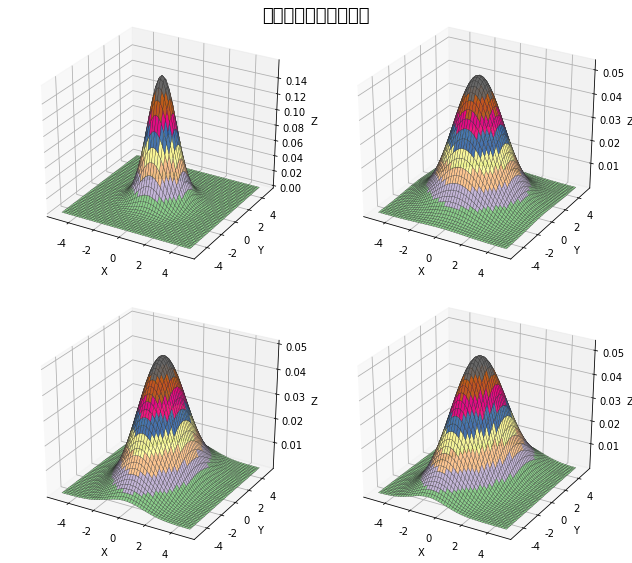

In [6]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-

import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


if __name__ == '__main__':
    x1, x2 = np.mgrid[-5:5:51j, -5:5:51j]
    x = np.stack((x1, x2), axis=2)
    print('x1 = \n', x1)
    print('x2 = \n', x2)
    print('x = \n', x)

    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['font.sans-serif'] = 'SimHei'
    plt.figure(figsize=(9, 8), facecolor='w')
    sigma = (np.identity(2), np.diag((3,3)), np.diag((2,5)), np.array(((2,1), (1,5))))
    for i in np.arange(4):
        ax = plt.subplot(2, 2, i+1, projection='3d')
        norm = stats.multivariate_normal((0, 0), sigma[i])
        y = norm.pdf(x)
        ax.plot_surface(x1, x2, y, cmap=cm.Accent, rstride=1, cstride=1, alpha=0.9, lw=0.3, edgecolor='#303030')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    plt.suptitle('二元高斯分布方差比较', fontsize=18)
    plt.tight_layout(1.5)
    plt.show()


In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(t[0], t[1], density, c='r', s=50*density, marker='o', depthshade=True, edgecolor='k')
ax.plot_surface()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('test3D', fontsize=15)
plt.tight_layout(0.1)
plt.show()